In [6]:
 !pip install transformers

In [7]:
import os
import pandas as pd
import numpy as np

In [8]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [9]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/6-class-bert-preprocessed-dataset/Bert_Preprocessed_Dataset.xlsx


In [10]:
df=pd.read_excel('/kaggle/input/6-class-bert-preprocessed-dataset/Bert_Preprocessed_Dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405 entries, 0 to 6404
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6405 non-null   int64 
 1   ID          6404 non-null   object
 2   Text        6404 non-null   object
 3   Sentiment   6405 non-null   object
 4   Label       6405 non-null   int64 
 5   Token       6405 non-null   object
 6   Token_ID    6405 non-null   object
dtypes: int64(2), object(5)
memory usage: 350.4+ KB


In [11]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 44.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 47.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.0-py3-none-any.whl size=25313832 sha256=9f936b3ec7338b144501a7357223a3c3ad8c0ffae3c50f4d87f2151b9ebbea76
  Stored in directory: /root/.cache/pip/wheels/cb/c2/1a/db7e1066fb4a94becc327ec359a493a8899089609d5569

In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [13]:
import ktrain
from ktrain import text

In [14]:
#df_filtered = df[df['Label'] > 0]
#df=df_filtered

In [15]:
df.Label.value_counts(), len(df)

(3    1924
 0    1427
 4    1366
 1     704
 5     592
 2     392
 Name: Label, dtype: int64,
 6405)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
encoded_labels = le.transform(df['Label'])
labels = np.array(encoded_labels) # Converting into numpy array
class_names =le.classes_
print(class_names)

def Label(label):
    if(label==1):
        return 'positive'
    elif(label==0):
        return 'neutral'
    elif(label==2):
        return 'negative'
df['Sentiment'] = df['Label'].apply(Label)
df.Sentiment.value_counts(), len(df)

In [16]:
df.Sentiment.value_counts(), len(df)

(happy      1924
 angry      1427
 sad        1366
 disgust     704
 surpise     592
 fear        392
 Name: Sentiment, dtype: int64,
 6405)

In [17]:
df.head()

,Unnamed: 0,ID,Text,Sentiment,Label,Token,Token_ID
0,479,939195189512152_939206382844366,উনারে লাথথায়ে মিরপুর চিড়িয়াখানার প্রধান সিকিউর...,angry,0,"['উনার', '##ে', 'লা', '##থ', '##থা', '##যে', '...","[36081, 2094, 3853, 7740, 12969, 8844, 15638, ..."
1,1750,935156429916028_935165096581828,কই এখন আপনি লেকচার থেমে গেল কেন ভাই,angry,0,"['কই', 'এখন', 'আপনি', 'লেকচার', 'থেমে', 'গেল',...","[6852, 2112, 2536, 22174, 3214, 2590, 2304, 2570]"
2,1855,987743164678331_1529633654011820,সুন্দর জোক্স,happy,3,"['সনদ', '##র', 'জে', '##াক', '##স']","[5391, 2046, 4803, 15547, 2388]"
3,1382,935324716565866_935576566540681,বেশির ভাগ ক্ষেত্রে যাত্রী গন কম ভুল করে আর বেশ...,sad,4,"['বেশির', 'ভাগ', 'কষে', '##তর', '##ে', 'যা', '...","[3217, 2516, 19675, 12499, 2094, 2120, 42396, ..."
4,3388,987743164678331_552808888211836,বাংলাদেশের হিন্দু মুসলিম সবাই ভাই ভাই যে অন্যন...,sad,4,"['বাংলাদেশের', 'হিন', '##দ', 'মস', '##লিম', 'স...","[2119, 50082, 5718, 23143, 33783, 2553, 2570, ..."


In [18]:
train=df[:int(.8*len(df))]
test=df[int(.8*len(df)):int(.9*len(df))]
validation=df[int(.9*len(df)):]
x_train=train['Token'].tolist()
y_train=train['Label'].tolist()
x_validation=validation['Token'].tolist()
y_validation=validation['Label'].tolist()
x_test=test['Token'].tolist()
y_test=test['Label'].tolist()

In [19]:
x_train= np.array(x_train)
x_validation= np.array(x_validation)
x_test= np.array(x_test)


In [20]:
categories = [0,1,2,3,4,5]

In [21]:
model_name = 'bert-base-multilingual-uncased'
trans = text.Transformer(model_name,maxlen=200,class_names=categories)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953M [00:00<?, ?B/s]

In [22]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 26
	95percentile : 74
	99percentile : 173


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 26
	95percentile : 76
	99percentile : 165


In [23]:
model = trans.get_classifier()

In [24]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [25]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(6)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
427/427 [==============================] - 242s 518ms/step - loss: 1.7815 - accuracy: 0.2182
Epoch 2/10
427/427 [==============================] - 229s 535ms/step - loss: 1.6588 - accuracy: 0.3085
Epoch 3/10
427/427 [==============================] - 229s 534ms/step - loss: 1.5258 - accuracy: 0.4073
Epoch 4/10
427/427 [==============================] - 229s 533ms/step - loss: 1.5127 - accuracy: 0.4094
Epoch 5/10
427/427 [==============================] - 229s 533ms/step - loss: 1.6995 - accuracy: 0.2801
Epoch 6/10
427/427 [==============================] - 228s 533ms/step - loss: 1.7068 - accuracy: 0.2705
Epoch 7/10
427/427 [==============================] - 209s 486ms/step - loss: 8.0011 - accuracy: 0.2271


done.
Visually inspect loss plot and select learning rate associated with falling loss


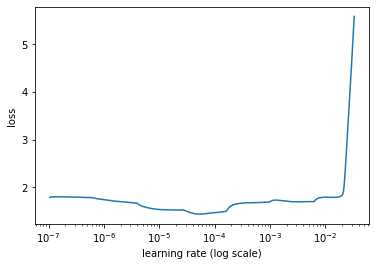

In [26]:
learner.lr_find(show_plot = True,max_epochs=10)

In [27]:
learner.fit_onecycle(5e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/10
427/427 [==============================] - 255s 561ms/step - loss: 1.7704 - accuracy: 0.2338 - val_loss: 1.6743 - val_accuracy: 0.3073
Epoch 2/10
427/427 [==============================] - 237s 555ms/step - loss: 1.6854 - accuracy: 0.3242 - val_loss: 1.5620 - val_accuracy: 0.4072
Epoch 3/10
427/427 [==============================] - 237s 555ms/step - loss: 1.6178 - accuracy: 0.3601 - val_loss: 1.4884 - val_accuracy: 0.4181
Epoch 4/10
427/427 [==============================] - 237s 555ms/step - loss: 1.5766 - accuracy: 0.3895 - val_loss: 1.4941 - val_accuracy: 0.4228
Epoch 5/10
427/427 [==============================] - 237s 555ms/step - loss: 1.5518 - accuracy: 0.4104 - val_loss: 1.4719 - val_accuracy: 0.3791
Epoch 6/10
427/427 [==============================] - 237s 555ms/step - loss: 1.5141 - accuracy: 0.4167 - val_loss: 1.4275 - val_accuracy: 0.4212
Epoch 7/10
427/427 [==============================] - 237s 55

In [28]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

           0       0.61      0.47      0.53       137
           1       0.20      0.29      0.23        72
           2       0.11      0.23      0.15        30
           3       0.69      0.64      0.66       195
           4       0.40      0.30      0.34       132
           5       0.33      0.37      0.35        75

    accuracy                           0.44       641
   macro avg       0.39      0.38      0.38       641
weighted avg       0.49      0.44      0.46       641



array([[ 64,  30,   6,  10,   9,  18],
       [ 15,  21,   3,  12,  11,  10],
       [  0,   5,   7,   4,   9,   5],
       [  6,  11,  20, 125,  21,  12],
       [ 14,  25,  19,  22,  39,  13],
       [  6,  15,   8,   9,   9,  28]])

In [29]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [30]:
y_pred_mbert_uncased = predictor.predict(x_test)
#print(y_pred)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mbert_uncased))

              precision    recall  f1-score   support

           0       0.55      0.42      0.48       144
           1       0.16      0.23      0.19        66
           2       0.11      0.19      0.14        32
           3       0.66      0.71      0.69       187
           4       0.38      0.22      0.28       148
           5       0.29      0.41      0.34        63

    accuracy                           0.43       640
   macro avg       0.36      0.36      0.35       640
weighted avg       0.46      0.43      0.43       640



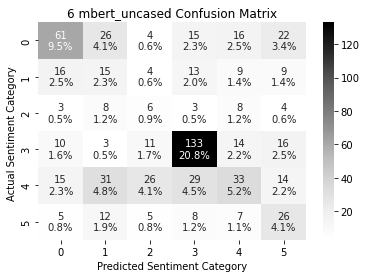

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_mbert_uncased)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('6 mbert_uncased Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5'])
sns.set(color_codes=True)
sns.set(font_scale=.8)
plt.savefig('6 mbert_uncased Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [34]:
model_name = 'monsoon-nlp/bangla-electra'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.6M [00:00<?, ?B/s]

In [35]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 26
	95percentile : 74
	99percentile : 173


Downloading:   0%|          | 0.00/161 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 26
	95percentile : 76
	99percentile : 165


In [36]:
model = trans.get_classifier()

In [37]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [38]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(6)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
427/427 [==============================] - 44s 61ms/step - loss: 1.7873 - accuracy: 0.1961
Epoch 2/10
427/427 [==============================] - 26s 60ms/step - loss: 1.7750 - accuracy: 0.2662
Epoch 3/10
427/427 [==============================] - 26s 59ms/step - loss: 1.7167 - accuracy: 0.3009
Epoch 4/10
427/427 [==============================] - 27s 60ms/step - loss: 1.6549 - accuracy: 0.3029
Epoch 5/10
427/427 [==============================] - 27s 60ms/step - loss: 1.6705 - accuracy: 0.2972
Epoch 6/10
427/427 [==============================] - 27s 61ms/step - loss: 1.6749 - accuracy: 0.2838
Epoch 7/10
427/427 [==============================] - 27s 61ms/step - loss: 1.6999 - accuracy: 0.2802
Epoch 8/10
427/427 [==============================] - 26s 60ms/step - loss: 1.6772 - accuracy: 0.2923
Epoch 9/10
427/427 [==============================] - 27s 61ms/step - loss: 1.7660 - accuracy: 0.2607

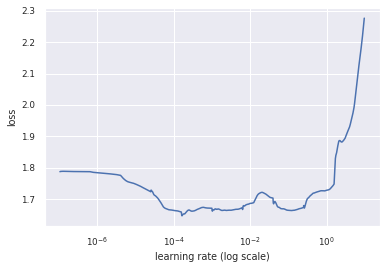

In [39]:
learner.lr_find(show_plot = True,max_epochs=10)

In [40]:
learner.fit_onecycle(1e-4,10,class_weight=weight) 



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
427/427 [==============================] - 47s 73ms/step - loss: 1.7907 - accuracy: 0.2080 - val_loss: 1.7853 - val_accuracy: 0.1966
Epoch 2/10
427/427 [==============================] - 28s 65ms/step - loss: 1.7832 - accuracy: 0.1587 - val_loss: 1.7760 - val_accuracy: 0.1466
Epoch 3/10
427/427 [==============================] - 28s 65ms/step - loss: 1.7633 - accuracy: 0.2164 - val_loss: 1.6678 - val_accuracy: 0.2715
Epoch 4/10
427/427 [==============================] - 27s 63ms/step - loss: 1.7097 - accuracy: 0.2771 - val_loss: 1.6142 - val_accuracy: 0.3479
Epoch 5/10
427/427 [==============================] - 27s 64ms/step - loss: 1.6685 - accuracy: 0.3230 - val_loss: 1.5624 - val_accuracy: 0.4025
Epoch 6/10
427/427 [==============================] - 28s 65ms/step - loss: 1.6360 - accuracy: 0.3552 - val_loss: 1.6525 - val_accuracy: 0.2761
Epoch 7/10
427/427 [==============================] - 27s 64ms/step - lo

In [41]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [42]:
y_pred_monsoon = predictor.predict(x_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_monsoon))

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       144
           1       0.09      0.03      0.04        66
           2       0.08      0.38      0.13        32
           3       0.65      0.60      0.63       187
           4       0.08      0.02      0.03       148
           5       0.20      0.38      0.27        63

    accuracy                           0.33       640
   macro avg       0.26      0.30      0.26       640
weighted avg       0.35      0.33      0.33       640



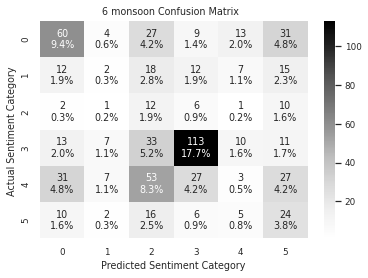

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_monsoon)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('6 monsoon Confusion Matrix  ');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5'])
sns.set(color_codes=True)
sns.set(font_scale=.8)
plt.savefig('6 Confusion Matrix monsoon.png', bbox_inches = "tight")
plt.show()

In [45]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=200,class_names=categories)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

In [46]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 26
	95percentile : 74
	99percentile : 173


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 26
	95percentile : 76
	99percentile : 165


In [47]:
model = trans.get_classifier()

In [48]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [49]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(6)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
427/427 [==============================] - 244s 534ms/step - loss: 1.7422 - accuracy: 0.2395
Epoch 2/10
427/427 [==============================] - 231s 539ms/step - loss: 1.6528 - accuracy: 0.2953
Epoch 3/10
427/427 [==============================] - 231s 539ms/step - loss: 1.6038 - accuracy: 0.3382
Epoch 4/10
427/427 [==============================] - 231s 539ms/step - loss: 1.5793 - accuracy: 0.3599
Epoch 5/10
427/427 [==============================] - 231s 538ms/step - loss: 1.7012 - accuracy: 0.2699
Epoch 6/10
427/427 [==============================] - 231s 538ms/step - loss: 1.7206 - accuracy: 0.2570
Epoch 7/10
427/427 [==============================] - 198s 463ms/step - loss: 8.9952 - accuracy: 0.2276


done.
Visually inspect loss plot and select learning rate associated with falling loss


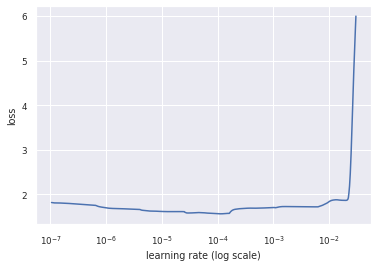

In [50]:
learner.lr_find(show_plot = True,max_epochs=10)

In [51]:
learner.fit_onecycle(1e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
427/427 [==============================] - 257s 568ms/step - loss: 1.7920 - accuracy: 0.1739 - val_loss: 1.7522 - val_accuracy: 0.2886
Epoch 2/10
427/427 [==============================] - 240s 561ms/step - loss: 1.7635 - accuracy: 0.2480 - val_loss: 1.6359 - val_accuracy: 0.3401
Epoch 3/10
427/427 [==============================] - 240s 561ms/step - loss: 1.6809 - accuracy: 0.3394 - val_loss: 1.5109 - val_accuracy: 0.3931
Epoch 4/10
427/427 [==============================] - 240s 561ms/step - loss: 1.5972 - accuracy: 0.3790 - val_loss: 1.4401 - val_accuracy: 0.4477
Epoch 5/10
427/427 [==============================] - 240s 561ms/step - loss: 1.5185 - accuracy: 0.4280 - val_loss: 1.5318 - val_accuracy: 0.3916
Epoch 6/10
427/427 [==============================] - 240s 561ms/step - loss: 1.4239 - accuracy: 0.4676 - val_loss: 1.4665 - val_accuracy: 0.4056
Epoch 7/10
427/427 [==============================] - 240s 56

In [52]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

           0       0.54      0.55      0.55       137
           1       0.16      0.17      0.17        72
           2       0.09      0.17      0.12        30
           3       0.72      0.67      0.70       195
           4       0.37      0.31      0.34       132
           5       0.27      0.29      0.28        75

    accuracy                           0.45       641
   macro avg       0.36      0.36      0.36       641
weighted avg       0.47      0.45      0.46       641



array([[ 76,  21,   4,   6,  13,  17],
       [ 17,  12,   6,  10,  15,  12],
       [  1,   3,   5,   5,   8,   8],
       [ 14,  11,  13, 131,  18,   8],
       [ 24,  17,  15,  19,  41,  16],
       [  9,   9,  10,  10,  15,  22]])

In [53]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [54]:
y_pred_mbert_cased = predictor.predict(x_test)
#print(y_pred)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mbert_cased))

              precision    recall  f1-score   support

           0       0.54      0.51      0.53       144
           1       0.17      0.18      0.17        66
           2       0.12      0.19      0.15        32
           3       0.71      0.66      0.68       187
           4       0.38      0.34      0.36       148
           5       0.26      0.30      0.28        63

    accuracy                           0.45       640
   macro avg       0.36      0.36      0.36       640
weighted avg       0.46      0.45      0.45       640



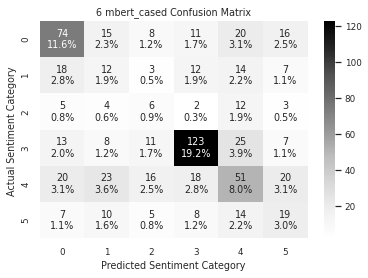

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_mbert_cased)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('6 mbert_cased Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('6 mbert_cased Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [62]:
import pandas as pd
sub_all=pd.DataFrame({'mbert_uncased':y_pred_mbert_uncased,'monsoon':y_pred_monsoon,'mbert_cased':y_pred_mbert_cased})
pred_mode=sub_all.agg('mode',axis=1)[0].values
sub_all.head()

,mbert_uncased,monsoon,mbert_cased
0,0,0,0
1,1,2,1
2,0,5,0
3,0,0,2
4,0,2,4


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_mode))

              precision    recall  f1-score   support

           0       0.47      0.60      0.53       144
           1       0.16      0.18      0.17        66
           2       0.09      0.22      0.13        32
           3       0.71      0.68      0.70       187
           4       0.35      0.14      0.20       148
           5       0.29      0.30      0.29        63

    accuracy                           0.42       640
   macro avg       0.34      0.35      0.33       640
weighted avg       0.44      0.42      0.42       640



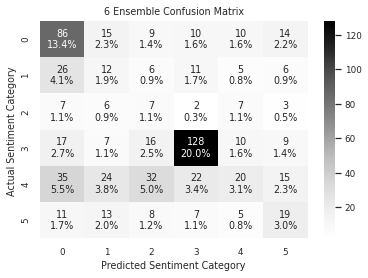

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred_mode)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('6 Ensemble Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5'])
sns.set(color_codes=True)
sns.set(font_scale=.4)
plt.savefig('6 Ensemble Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [68]:
df_result= sub_all
df_result['final prediction']= pred_mode
df_result['Actual Sentiment']= y_test
df_result['Text']=test['Text'].tolist()
df_result.to_csv('6 classes Ensemble Prediction results.csv', index=True)